In [1]:
# Data processing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/AhdaAI/Tugas-1-AI_BigData/main/fuel_consumption/FuelConsumptionCo2.csv'
df = pd.read_csv(url)
# df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
feat = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
feat.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


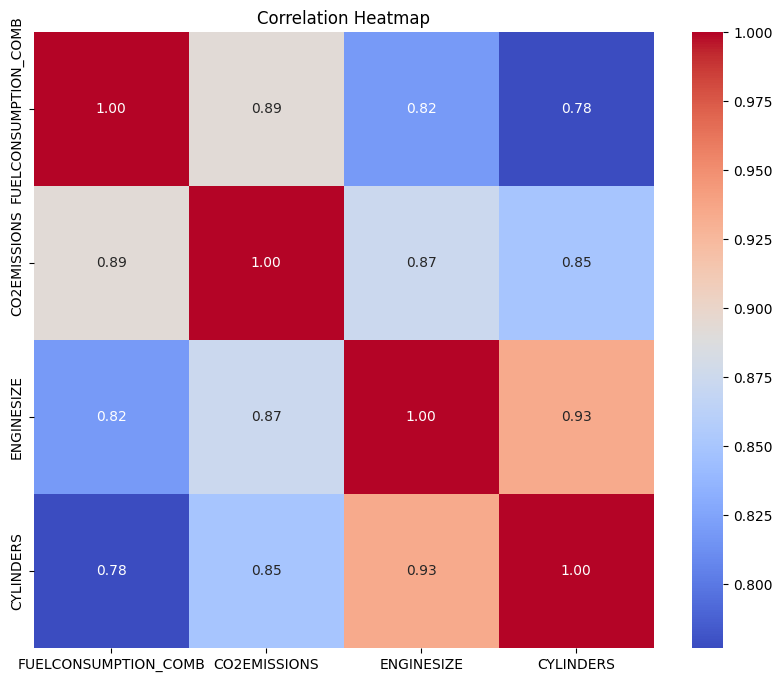

In [14]:
data = df[["FUELCONSUMPTION_COMB", "CO2EMISSIONS", "ENGINESIZE", "CYLINDERS"]]
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Data Ploting

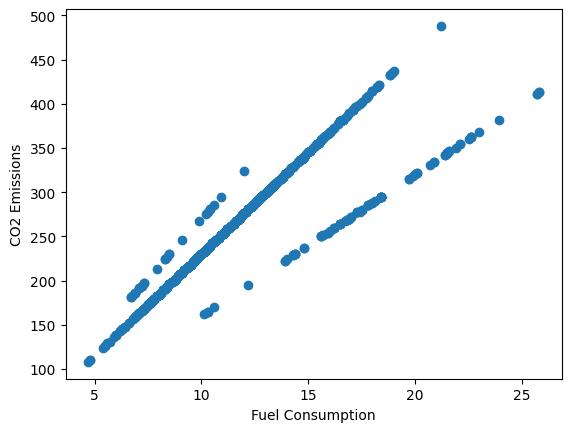

In [5]:
plt.scatter(feat['FUELCONSUMPTION_COMB'], feat['CO2EMISSIONS'])
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

# **Linear Regression**

## Data Training

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = feat[msk]
test = feat[~msk]

train_x = train[['FUELCONSUMPTION_COMB']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['FUELCONSUMPTION_COMB']]
test_y = test[['CO2EMISSIONS']]

## Modelling

In [7]:
from sklearn import linear_model

print('\nModelling using FUELCONSUMPTION_COMB :')
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

print('Coefficient : ', reg.coef_[0][0])
print('Intercept : ', reg.intercept_[0])


Modelling using FUELCONSUMPTION_COMB :
Coefficient :  16.24293456509464
Intercept :  68.260507586047


Text(0, 0.5, 'CO2 Emissions')

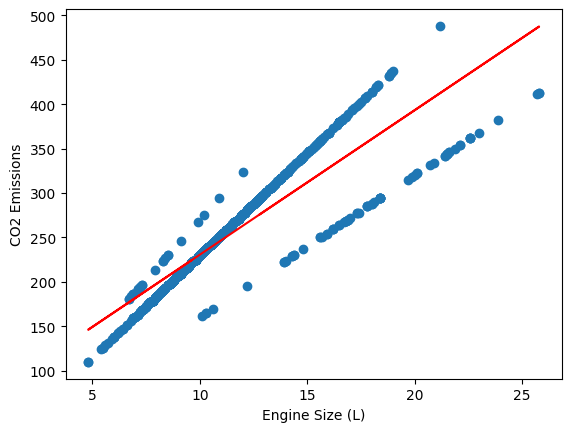

In [8]:
plt.scatter(train_x, train_y)
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions')

In [9]:
predictions = reg.predict(test_x)

print('\nModel Evaluation :')
print('R2-Score : ', r2_score(test_y, predictions))


Model Evaluation :
R2-Score :  0.7849734661405378


# **SVM**

In [10]:
# x = feature
# y = target

x = df[["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS"]]
y = df ["CO2EMISSIONS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Creating SVM Model

Model Accuracy: 0.6759612830452959


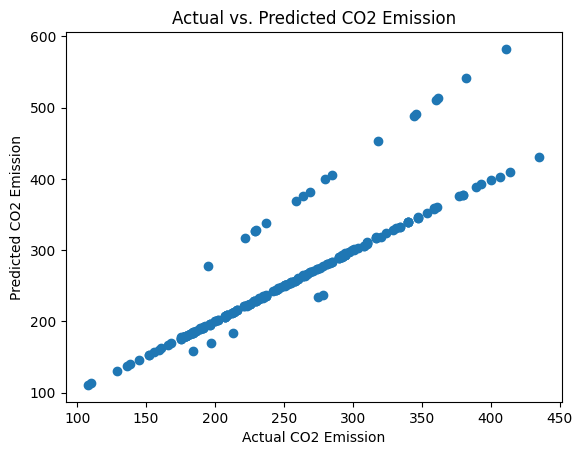

In [11]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')
svm.fit(x_train_scaled, y_train)

y_pred = svm.predict(x_test_scaled)

# Evaluate the model
accuracy = svm.score(x_test_scaled, y_test)
print("Model Accuracy:", accuracy)

# Plot actual vs. predicted CO2 emissions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission")
plt.show()

# **Decision Tree**

Mean Squared Error: 210.47627855659397
R-squared: 0.9490981734371711


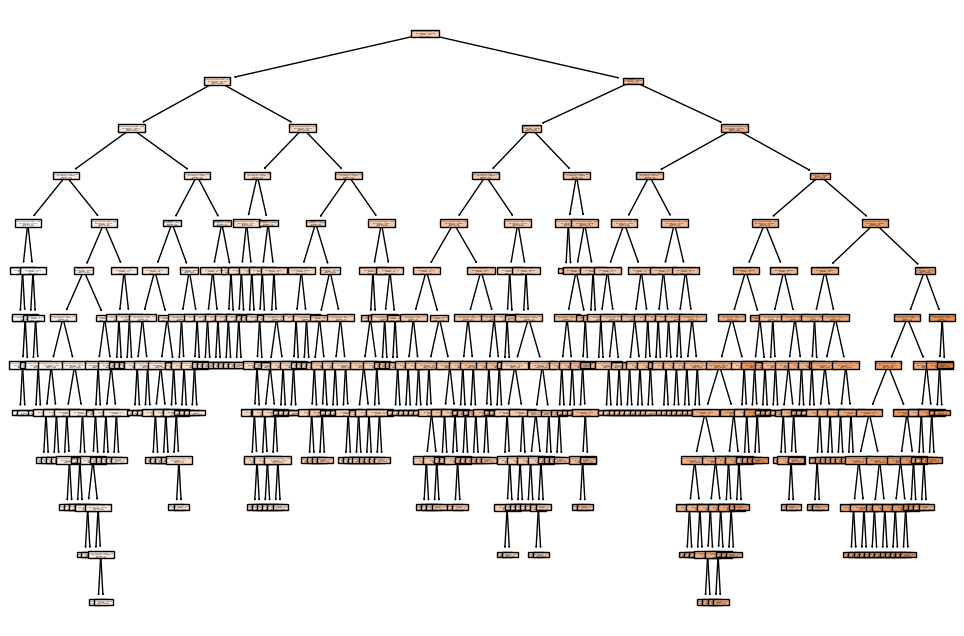

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)

dt_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, dt_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2_score(y_test, dt_pred))

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=x.columns)
plt.show()

# **K Neighbor Classification**

Mean Squared Error: 1339.8824336626951
R-squared: 0.6759612830452959


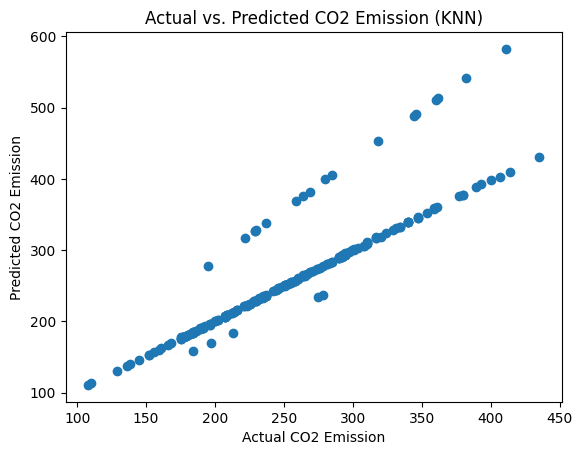

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)
knn_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission (KNN)")
plt.show()